## British Airways - Predicting Customers Behaviours


Build a predictive model to understand factors that influence buying behaviour

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [164]:
data_cust = pd.read_csv("data/customer_booking.csv", encoding='ISO-8859-1')

In [165]:
data_cust.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0


In [166]:
#copy the originall data
df_cust = data_cust.copy()

In [167]:
df_cust.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0


In [168]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

- num_passengers = nomor penumpang
- sales_channel = saluran penjualan
- trip_type = jenis jenis trip
- purchase_lead = prospek pembelian
- length_of_stay = jumlah hari untuk tinggal
- flight_hour = jumlah waktu yang dihabiskan pilot untuk terbang selama periode tertentu
- flight_day = hari penerbanagn dari tengah malam hingga tengah malam
- route =  rute
- booking_origin = tempat reservation booking dibuat
- wants_extra_baggage = yang mau bagasi ekstra
- wants_in_flight_meals = yang mau makanan penerbangan
- flight_duration = waktu yang dibutuhkan penerbangan dari keberangkatan ke kedatangan
- booking_complete = reservasi atau pemesanan yang sudah selesai yang sudah dikonfirmasi

In [169]:
df_cust.shape

(50000, 14)

In [170]:
#check the columns
df_cust.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

### Exploratory Data Analysis (EDA)

**var target = 'booking_complete'**

In [171]:
#see the summary of dataframe
df_cust.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [172]:
df_cust.isnull().any()

num_passengers           False
sales_channel            False
trip_type                False
purchase_lead            False
length_of_stay           False
flight_hour              False
flight_day               False
route                    False
booking_origin           False
wants_extra_baggage      False
wants_preferred_seat     False
wants_in_flight_meals    False
flight_duration          False
booking_complete         False
dtype: bool

#### flight duration

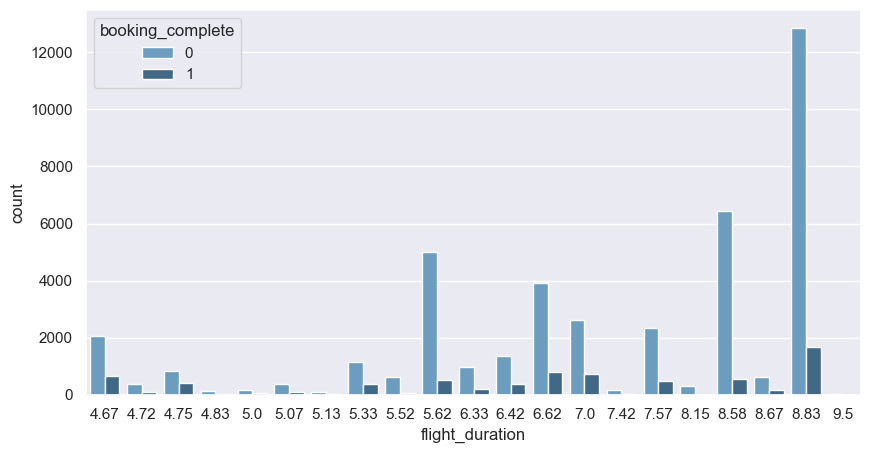

In [173]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(df_cust['flight_duration'], hue=df_cust['booking_complete'], palette = 'Blues_d')
sns.set(rc={'figure.figsize':(12,12)}) # width, height

<AxesSubplot:xlabel='flight_duration', ylabel='Density'>

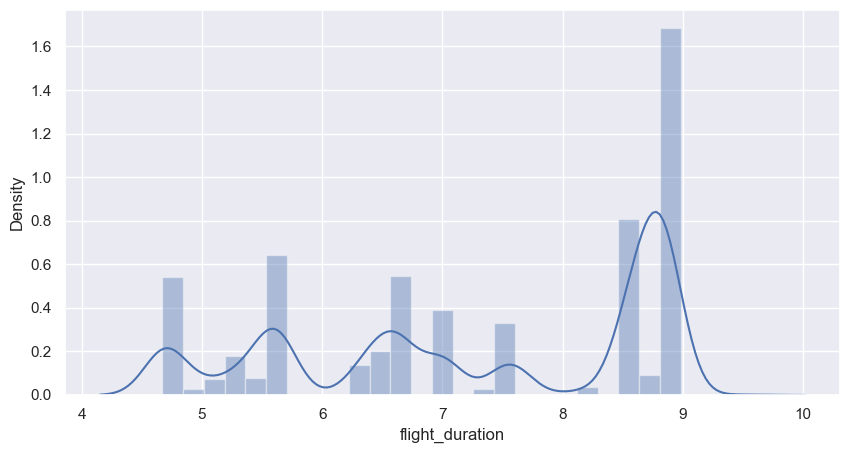

In [174]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_cust['flight_duration'])

In [175]:
df_cust['flight_duration'].mean()

7.277560799998812

- most flight duration occurs for more than 8 hours
- the mean flight duration is 7.3 hours
- many made flights longer than 8 hours for which the order had not been confirmed
- if seen from the distribution, flight duration has left skewed

#### purchase lead

<AxesSubplot:xlabel='purchase_lead', ylabel='Density'>

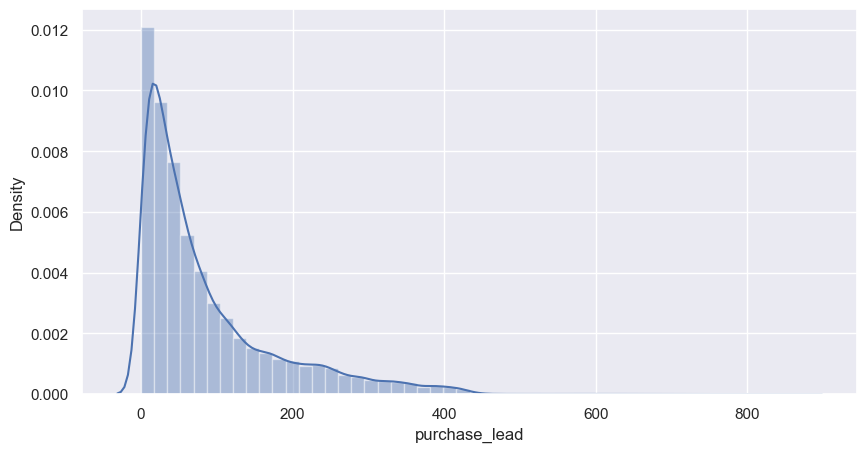

In [176]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_cust['purchase_lead'])

- purchase lead has a right skew which may have outliers

#### flight hour

<AxesSubplot:xlabel='flight_hour', ylabel='Density'>

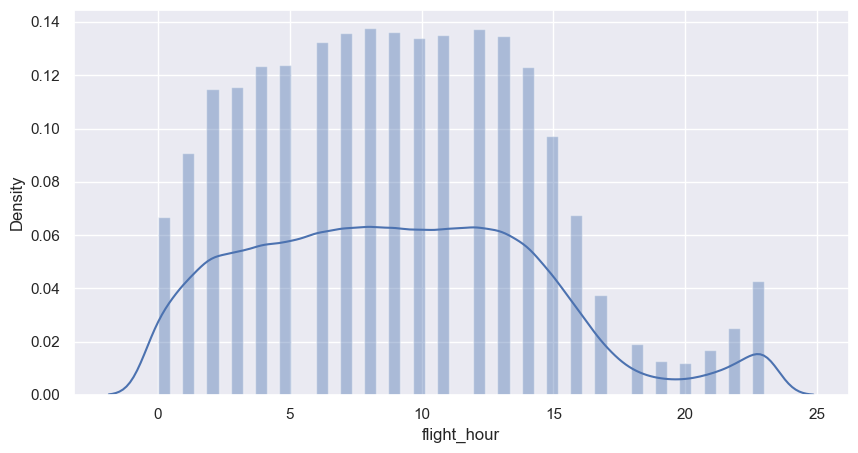

In [177]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_cust['flight_hour'])

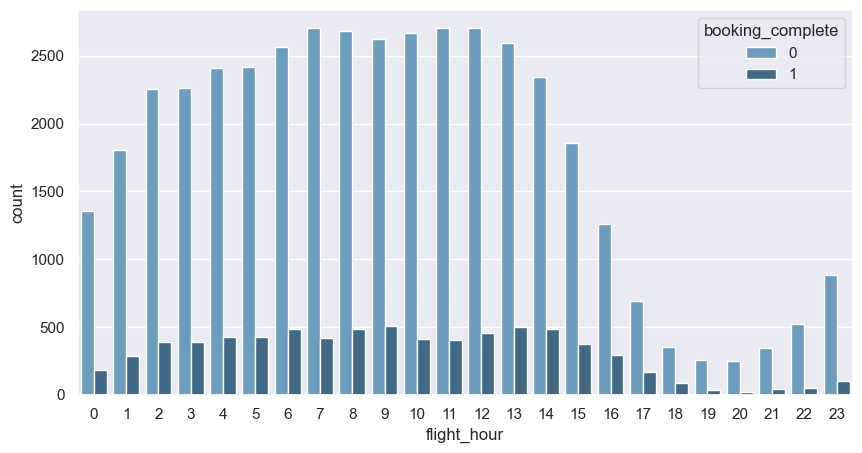

In [178]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(df_cust['flight_hour'], hue=df_cust['booking_complete'], palette = 'Blues_d')
sns.set(rc={'figure.figsize':(12,12)}) # width, height

- the average flight_hour is about 15 hours
- there is a skewed which is an indication if there are outliers

### booking complete

<AxesSubplot:xlabel='booking_complete', ylabel='Density'>

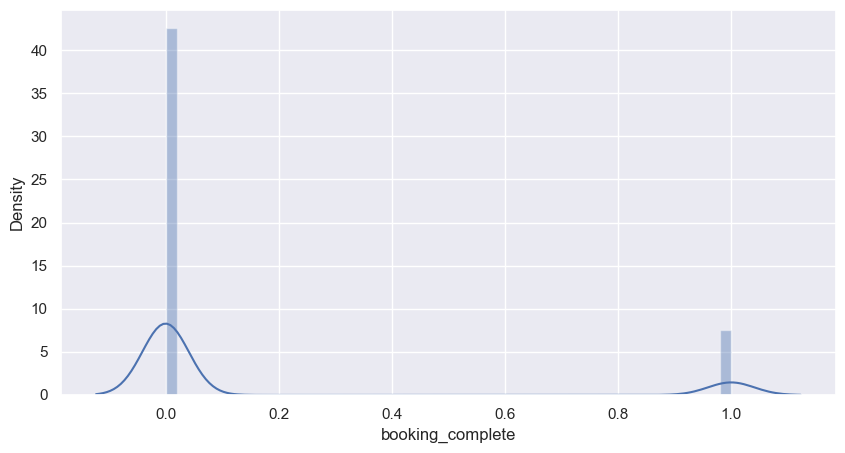

In [179]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_cust['booking_complete'])

- if we see at this distribution, mostly customer still not complete the booking

<AxesSubplot:xlabel='length_of_stay', ylabel='Density'>

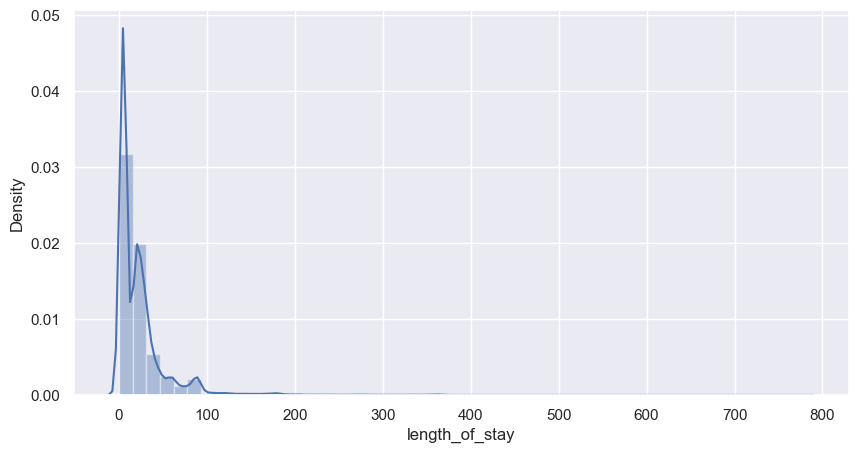

In [180]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_cust['length_of_stay'])

- in the section length of stay there is a right skew which is an indication of an outlier

<AxesSubplot:xlabel='wants_extra_baggage', ylabel='Density'>

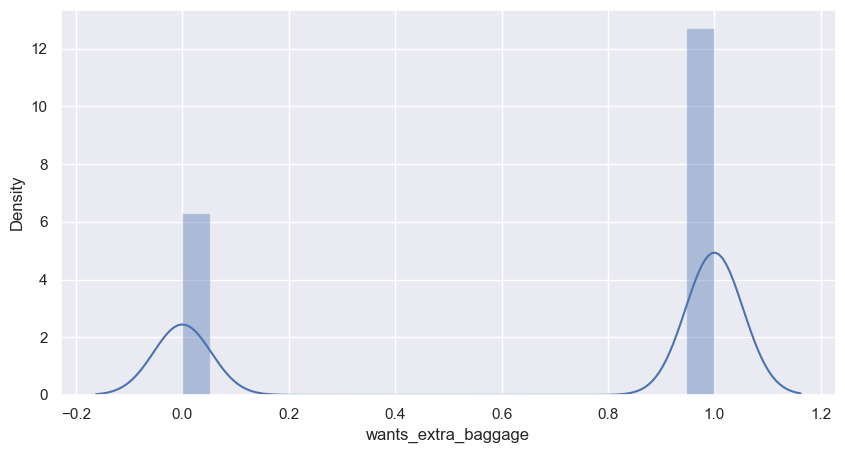

In [181]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_cust['wants_extra_baggage'])

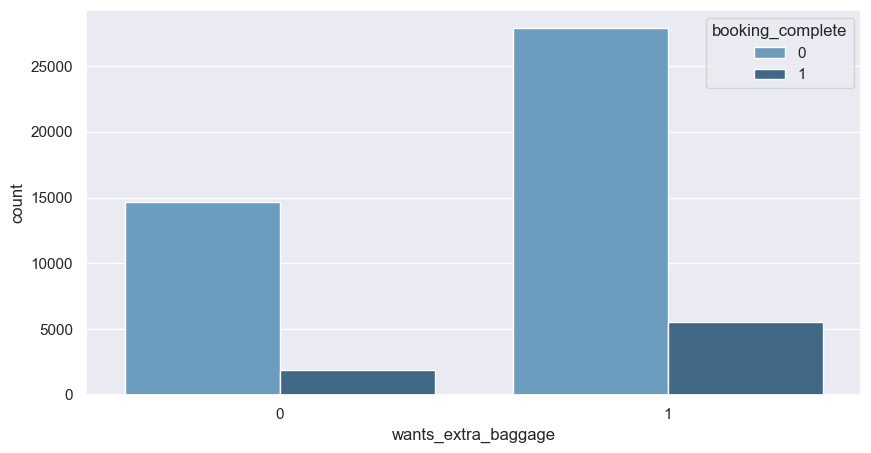

In [182]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(df_cust['wants_extra_baggage'], hue=df_cust['booking_complete'], palette = 'Blues_d')
sns.set(rc={'figure.figsize':(12,12)}) # width, height

- mostly customers want extra baggage
- and mostly from customers who ask for more baggage, they haven't made a complete booking

<AxesSubplot:xlabel='wants_preferred_seat', ylabel='Density'>

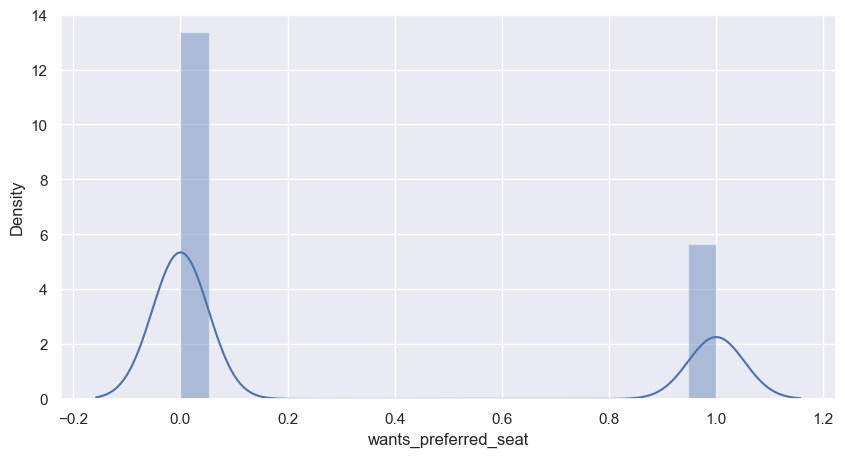

In [183]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_cust['wants_preferred_seat'])

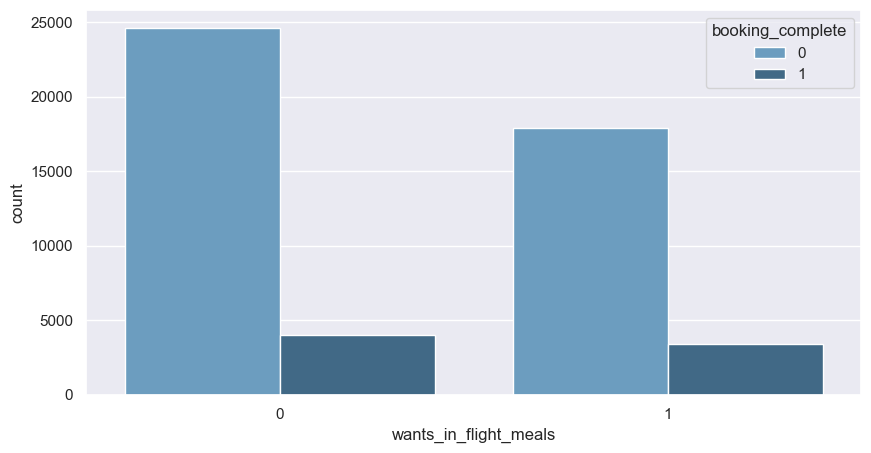

In [184]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(df_cust['wants_in_flight_meals'], hue=df_cust['booking_complete'], palette = 'Blues_d')
sns.set(rc={'figure.figsize':(12,12)}) # width, height

<AxesSubplot:xlabel='wants_in_flight_meals', ylabel='Density'>

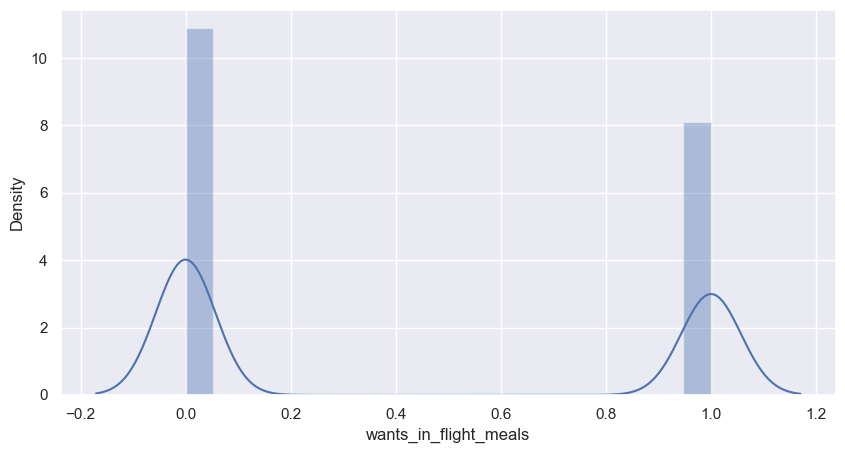

In [185]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_cust['wants_in_flight_meals'])

- most customers don't want flight food
- most still haven't made a complete booking

In [186]:
#check the columns
df_cust.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

<Figure size 1000x500 with 0 Axes>

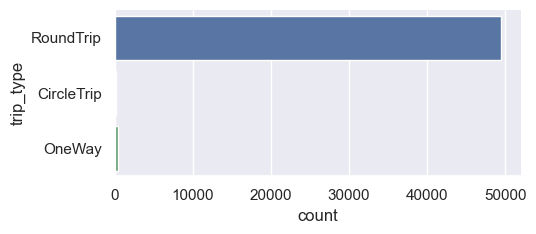

In [187]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='trip_type', kind='count', data=df_cust, height=2.5, aspect=2.2, palette = 'deep')

<AxesSubplot:xlabel='trip_type', ylabel='count'>

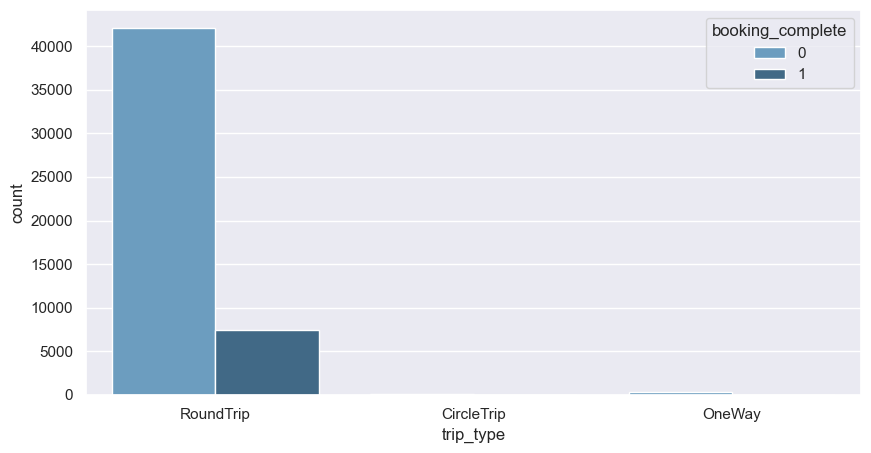

In [188]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(df_cust['trip_type'], hue=df_cust['booking_complete'], palette = 'Blues_d')

In [189]:
df_cust['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [190]:
#percentage trip_type rate
cr = df_cust.trip_type.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
cr

RoundTrip     99.0%
OneWay         0.8%
CircleTrip     0.2%
Name: trip_type, dtype: object

The summary about the Trip Type  with booking Complete
- Mostly the customer do the Trip Type Round Trip
- the customer who choose the one way trip just have 0,8 % from the wholes
- The customer who choose the circle trip just 0.2%
- the customer in the trip type round trip, have the complete booking is more than 5000 and the customer round trip who have not complete booking more than 40000
- and the oneway trip custemer mostly not complete booking

In [191]:
df_cust['flight_day'].value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [192]:
#percentage trip_type rate
cf = df_cust.flight_day.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
cf

Mon    16.2%
Wed    15.3%
Tue    15.3%
Thu    14.8%
Fri    13.5%
Sun    13.1%
Sat    11.6%
Name: flight_day, dtype: object

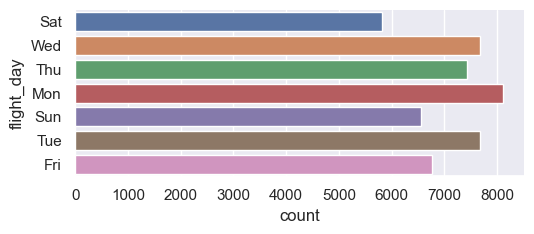

In [193]:
sns.catplot(y='flight_day', kind='count', data=df_cust, height=2.5, aspect=2.2, palette = 'deep')

<AxesSubplot:xlabel='flight_day', ylabel='count'>

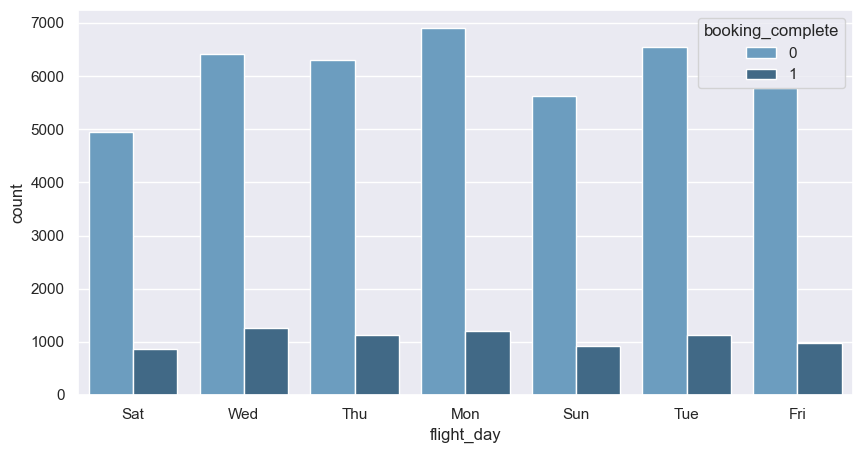

In [194]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(df_cust['flight_day'], hue=df_cust['booking_complete'], palette = 'Blues_d')

the summary about the flight days
- Most flight days are Monday, Tuesday and Thursday
- Lax flight days are on Saturdays
- the average on all days is dominated by not complete bookings

In [195]:
#percentage trip_type rate
preroute= df_cust.route.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
preroute

AKLKUL    5.4%
PENTPE    1.8%
MELSGN    1.7%
ICNSIN    1.6%
DMKKIX    1.5%
          ... 
LBUTPE    0.0%
CXRMEL    0.0%
DELKBR    0.0%
KOSSYD    0.0%
MRUXIY    0.0%
Name: route, Length: 799, dtype: object

In [196]:
df_cust['route'].value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

- flight route =
AKL - KUL
PEN - TPE
MEL - SGN
ICN - SIN
DMK - KIX

- future plan > change with other options except the first 5


In [197]:
df_cust['departure'] = df_cust['route'].apply(lambda x: x[:3])

In [198]:
df_cust['destination'] = df_cust['route'].apply(lambda x: x[3:])

In [199]:
df_cust.head(15)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,destination
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0,AKL,DEL
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0,AKL,DEL
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0,AKL,DEL
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0,AKL,DEL


In [200]:
df_cust['departure'].value_counts()

DMK    3747
ICN    3732
MEL    3468
DPS    2902
AKL    2849
       ... 
CSX       4
NRT       2
CXR       1
BTJ       1
URT       1
Name: departure, Length: 85, dtype: int64

In [201]:
#check departure size
departure_count = df_cust.groupby(['departure'], as_index=False).size().sort_values('size', ascending=False)
departure_count.head(10)

,departure,size
26,DMK,3747
36,ICN,3732
56,MEL,3468
27,DPS,2902
0,AKL,2849
33,HKT,2387
13,CGK,2339
65,PEN,2111
34,HND,1774
17,COK,1673


In [202]:
#check size detination
destination_count = df_cust.groupby(['destination'], as_index=False).size().sort_values('size', ascending=False)
destination_count.head(10)

,destination,size
52,SYD,6616
39,PER,4992
28,MEL,4444
55,TPE,4044
35,OOL,2796
22,KUL,2688
38,PEN,2483
19,KIX,2240
11,ICN,2213
48,SIN,2157


In [203]:
booking_origin_count = df_cust.groupby(['booking_origin'], as_index=False).size().sort_values('size', ascending=False)
booking_origin_count.head(10)

,booking_origin,size
4,Australia,17872
51,Malaysia,7174
85,South Korea,4559
43,Japan,3885
17,China,3387
37,Indonesia,2369
91,Taiwan,2077
93,Thailand,2030
36,India,1270
61,New Zealand,1074


In [204]:
#percentage trip_type rate
pre_bo= df_cust.booking_origin.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pre_bo

Australia               35.7%
Malaysia                14.3%
South Korea              9.1%
Japan                    7.8%
China                    6.8%
                        ...  
Panama                   0.0%
Tonga                    0.0%
Tanzania                 0.0%
Bulgaria                 0.0%
Svalbard & Jan Mayen     0.0%
Name: booking_origin, Length: 104, dtype: object

- the most booking origins are in Australia, Malaysia, South Korea, Japan and China
- future plan > later the others will be replaced with other opt

In [205]:
dfs = df_cust.groupby(['sales_channel','route'])['booking_complete'].sum().reset_index()

- AKL = auckland
- KUL = kualalumpur

In [206]:
dfs.head()

,sales_channel,route,booking_complete
0,Internet,AKLDEL,0
1,Internet,AKLHGH,0
2,Internet,AKLHND,0
3,Internet,AKLICN,0
4,Internet,AKLKIX,0


In [207]:
dfs[dfs['booking_complete'] >20].sort_values(by='route', ascending=True)

,sales_channel,route,booking_complete
6,Internet,AKLKUL,533
787,Mobile,AKLKUL,34
40,Internet,BKIHND,27
41,Internet,BKIICN,83
42,Internet,BKIKIX,34
...,...,...,...
704,Internet,PENTPE,371
1299,Mobile,PENTPE,30
714,Internet,PERSGN,29
751,Internet,SBWTPE,31


In [208]:
dfs[dfs['booking_complete'] >100].sort_values(by='route', ascending=True)

,sales_channel,route,booking_complete
6,Internet,AKLKUL,533
281,Internet,DMKKIX,160
422,Internet,ICNPEN,128
460,Internet,JHBKTM,162
564,Internet,KTMPEN,118
614,Internet,MELPEN,117
704,Internet,PENTPE,371


- booking complete mostly on aklkul routes as many as 533, PENTEP = 371
- and if you look at those who have more than 20 complete bookings, only about 74 route departures and destinations
- and if you look at the standard of more than 100 there are only about 7 routes

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

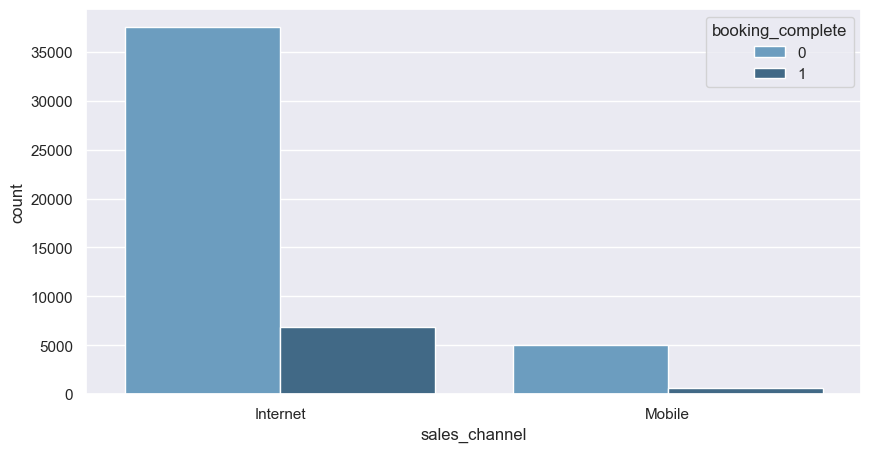

In [209]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(df_cust['sales_channel'], hue=df_cust['booking_complete'], palette = 'Blues_d')

In [210]:
#percentage trip_type rate
prec= df_cust.sales_channel.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
prec

Internet    88.8%
Mobile      11.2%
Name: sales_channel, dtype: object

- 88.8% of customers order with internet with not complete booking
- 11.2% of customers ordered via mobile and were equally dominated by not complete bookings

**The target is booking_complete**

In [211]:
df_cust.sort_values(by=['route', 'booking_complete'], 
                    ascending=[False, True]).head(50) #mengurutkan lebih dari 1 kolom

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,destination
42242,2,Internet,RoundTrip,27,5,3,Sat,URTXIY,China,1,0,0,5.00,0,URT,XIY
25593,2,Internet,RoundTrip,22,30,7,Fri,TWUXIY,China,1,1,0,5.00,0,TWU,XIY
25594,1,Internet,RoundTrip,20,28,16,Thu,TWUXIY,China,1,0,0,5.00,0,TWU,XIY
25595,1,Internet,RoundTrip,28,26,9,Wed,TWUXIY,Malaysia,1,0,1,5.00,0,TWU,XIY
34956,2,Internet,RoundTrip,175,4,13,Mon,TWUXIY,China,0,0,0,5.00,0,TWU,XIY
42241,2,Internet,RoundTrip,29,5,9,Thu,TWUXIY,China,0,0,0,5.00,0,TWU,XIY
25596,1,Internet,RoundTrip,34,60,5,Tue,TWUXIY,Malaysia,0,0,0,5.00,1,TWU,XIY
42240,2,Internet,RoundTrip,33,5,2,Sun,TWUXIY,China,1,1,1,5.00,1,TWU,XIY
34955,2,Internet,RoundTrip,44,4,8,Sat,TWUWUH,China,1,0,0,5.13,0,TWU,WUH
42239,2,Internet,RoundTrip,17,5,10,Wed,TWUWUH,China,1,0,0,5.13,1,TWU,WUH


In [212]:
sudah = df_cust[df_cust['booking_complete']==1]
sudah.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,destination
82,1,Internet,RoundTrip,15,31,17,Mon,AKLKUL,Malaysia,0,0,0,8.83,1,AKL,KUL
86,1,Internet,RoundTrip,156,19,14,Mon,AKLKUL,Malaysia,1,0,0,8.83,1,AKL,KUL
94,1,Internet,RoundTrip,181,87,2,Tue,AKLKUL,Singapore,1,0,1,8.83,1,AKL,KUL
109,1,Mobile,RoundTrip,127,17,16,Tue,AKLKUL,Malaysia,1,0,1,8.83,1,AKL,KUL
122,1,Internet,RoundTrip,42,17,14,Tue,AKLKUL,Malaysia,0,0,0,8.83,1,AKL,KUL


In [213]:
sudah.shape

(7478, 16)

In [214]:
belom = df_cust[df_cust['booking_complete']==0]
belom.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,destination
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,AKL,DEL


In [215]:
belom.shape

(42522, 16)

In [216]:
bc= df_cust.booking_complete.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
bc

0    85.0%
1    15.0%
Name: booking_complete, dtype: object

- there are 85% of customers not booking complete
- and the rest booking complete

<Figure size 1000x500 with 0 Axes>

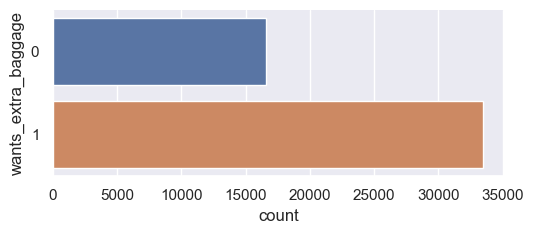

In [217]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='wants_extra_baggage', kind='count', data=df_cust, height=2.5, aspect=2.2, palette = 'deep')

In [218]:
df_cust['wants_extra_baggage'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

1    66.9%
0    33.1%
Name: wants_extra_baggage, dtype: object

<Figure size 1000x500 with 0 Axes>

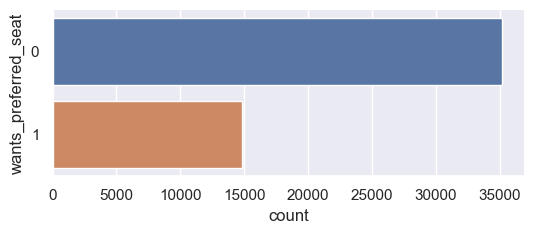

In [219]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='wants_preferred_seat', kind='count', data=df_cust, height=2.5, aspect=2.2, palette = 'deep')

In [220]:
df_cust['wants_preferred_seat'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    70.3%
1    29.7%
Name: wants_preferred_seat, dtype: object

<Figure size 1000x500 with 0 Axes>

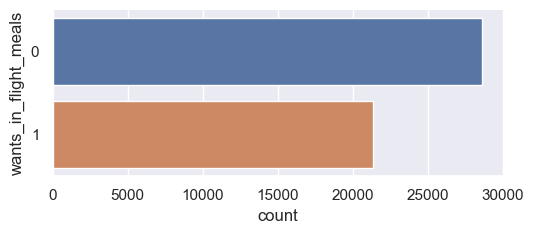

In [221]:
fig = plt.figure(figsize=(10, 5))
sns.catplot(y='wants_in_flight_meals', kind='count', data=df_cust, height=2.5, aspect=2.2, palette = 'deep')

In [222]:
df_cust['wants_in_flight_meals'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

0    57.3%
1    42.7%
Name: wants_in_flight_meals, dtype: object

- 66% of customers want the extra baggage
- mostly customers don't choose seats, only about 30% do
- 57% of customers don't want to eat during the flight and 43% want to eat

# Feature Engeneering

In [223]:
booking_originremake = df_cust['booking_origin'].value_counts()
booking_originremake

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [224]:
# Keep only the top 5 values
top_5 = booking_originremake[:5].index

In [225]:
top_5

Index(['Australia', 'Malaysia', 'South Korea', 'Japan', 'China'], dtype='object')

- Australia,Malaysia, South Korea,Japan,China (other than this is 'others')

In [226]:
# Replace all values outside of the top 5 with "Others"
df_cust['booking_origin'] = df_cust['booking_origin'].apply(lambda x: x if x in top_5 else "Others")

In [227]:
df_cust.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,destination
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,Others,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,Others,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,Others,1,1,0,5.52,0,AKL,DEL


In [228]:
df_cust.shape

(50000, 16)

#### Handling Outliers

<AxesSubplot:xlabel='purchase_lead'>

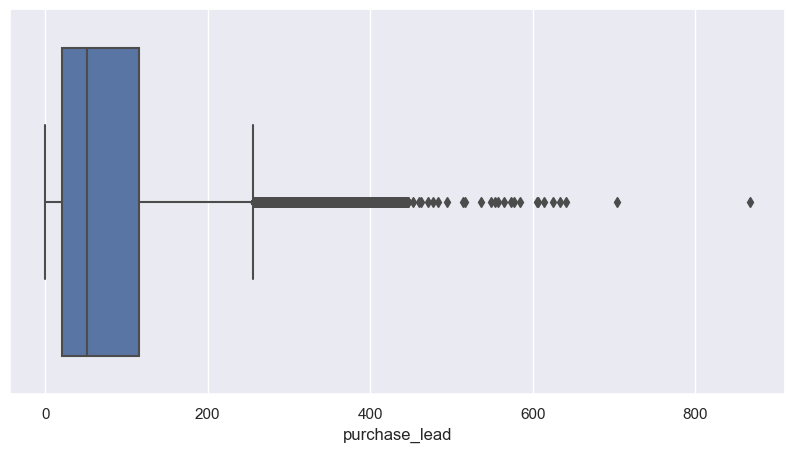

In [229]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='purchase_lead', data=df_cust)

<AxesSubplot:xlabel='length_of_stay'>

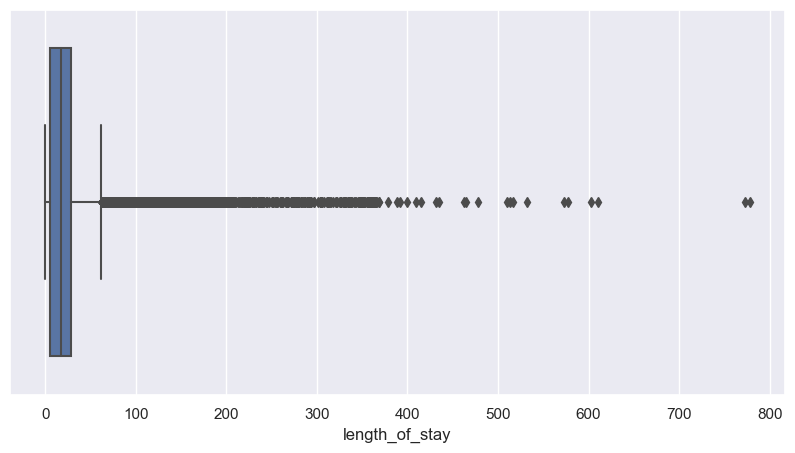

In [230]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='length_of_stay', data=df_cust)

<AxesSubplot:xlabel='flight_duration'>

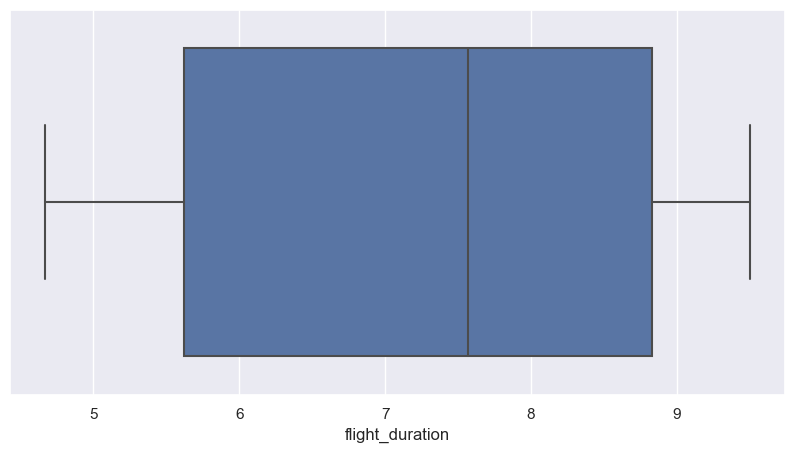

In [231]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='flight_duration', data=df_cust)

<AxesSubplot:xlabel='flight_hour'>

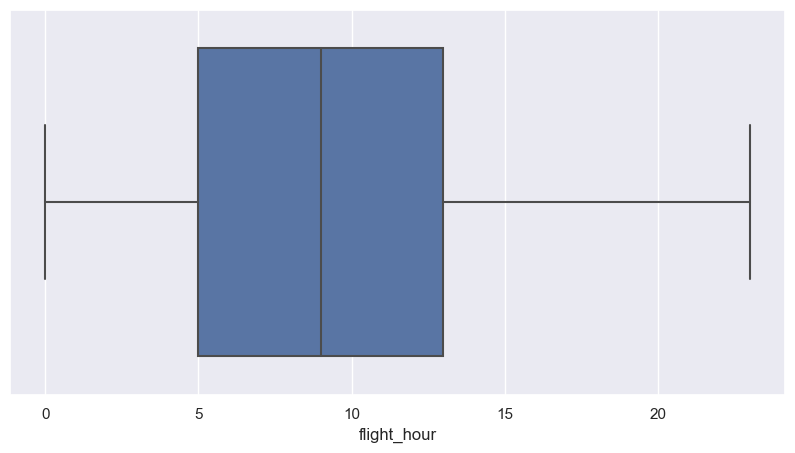

In [232]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='flight_hour', data=df_cust)

need to handle outlier = 

- purchase lead
- length of stay


In [233]:
df_cust['purchase_lead'].describe()

count    50000.000000
mean        84.940480
std         90.451378
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

In [234]:
df_cust['purchase_lead'].quantile(0.25)

21.0

In [235]:
df_cust['purchase_lead'].quantile(0.75)

115.0

In [236]:
Q1 = df_cust['purchase_lead'].quantile(0.25)
Q3 = df_cust['purchase_lead'].quantile(0.75)
IQR = Q3 - Q1

In [237]:
IQR

94.0

In [238]:
lower_lin = Q1 - 1.5 * IQR
upper_lin = Q3 + 1.5 * IQR

In [239]:
lower_lin

-120.0

In [240]:
upper_lin

256.0

Our upper boundary is 256.0 and our lower boundary is -120.0. 
This means that these values between -120.0 and 256.0 are acceptable 
but those outside mean there are outliers. 
So we need to handle them because they corrupt our data.

### with winsorize

In [241]:
from scipy.stats.mstats import winsorize

In [242]:
win_data = winsorize(df_cust['purchase_lead'], limits=(0.01, 0.02))

In [243]:
win_data

masked_array(data=[262, 112, 243, ...,  24,  15,  19],
             mask=False,
       fill_value=999999,
            dtype=int64)

<AxesSubplot:>

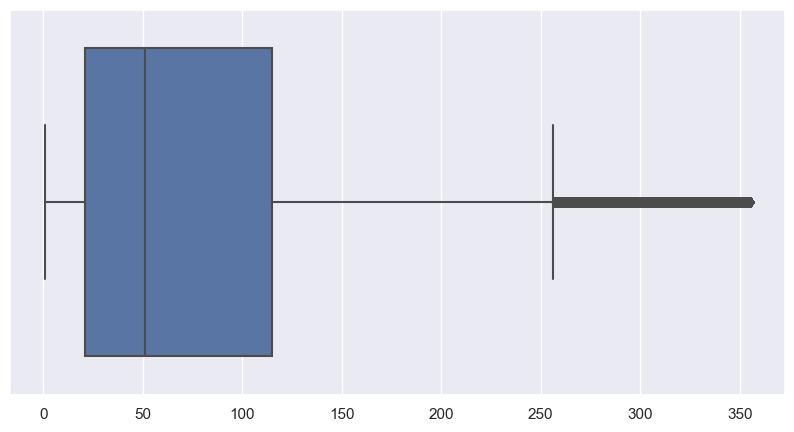

In [244]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x=win_data)

<AxesSubplot:>

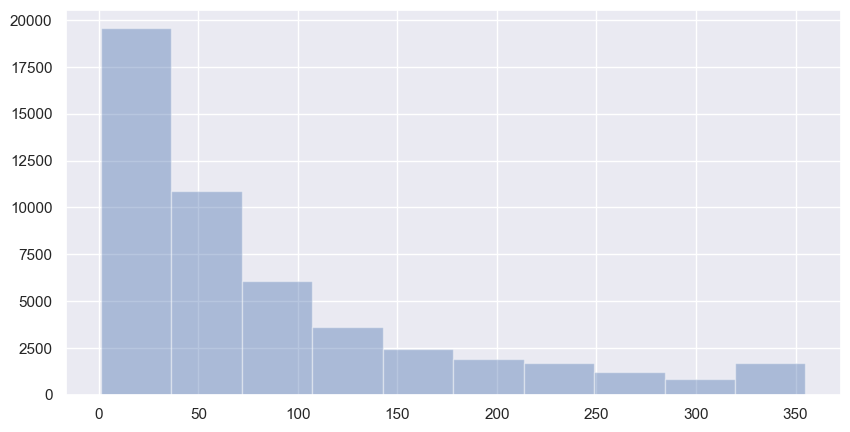

In [245]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(win_data,bins=10, kde=False)

#### drop outlier

In [246]:
outlier_15_low = (df_cust['purchase_lead'] < lower_lin)

In [247]:
outlier_15_up = (df_cust['purchase_lead'] > upper_lin)

In [248]:
len(df_cust['purchase_lead']) - (len( df_cust['purchase_lead'][outlier_15_low]) + len( df_cust['purchase_lead'][outlier_15_up])) 

46544

In [249]:
df_cust['purchase_lead'][(outlier_15_low | outlier_15_up)]

0        262
9        378
12       265
16       259
19       351
        ... 
49955    366
49967    279
49973    333
49975    265
49981    317
Name: purchase_lead, Length: 3456, dtype: int64

In [250]:
df_cust['purchase_lead'][-(outlier_15_low | outlier_15_up)]

1        112
2        243
3         96
4         68
5          3
        ... 
49995     27
49996    111
49997     24
49998     15
49999     19
Name: purchase_lead, Length: 46544, dtype: int64

In [251]:
df_cust = df_cust[~(outlier_15_low | outlier_15_up)]

In [252]:
df_cust

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,destination
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,Others,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,Others,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,Others,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,Others,1,0,1,5.52,0,AKL,DEL
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,Others,1,0,1,5.52,0,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0,PER,PNH
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0,PER,PNH
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0,PER,PNH
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0,PER,PNH


We removed the outliers 

<AxesSubplot:xlabel='purchase_lead'>

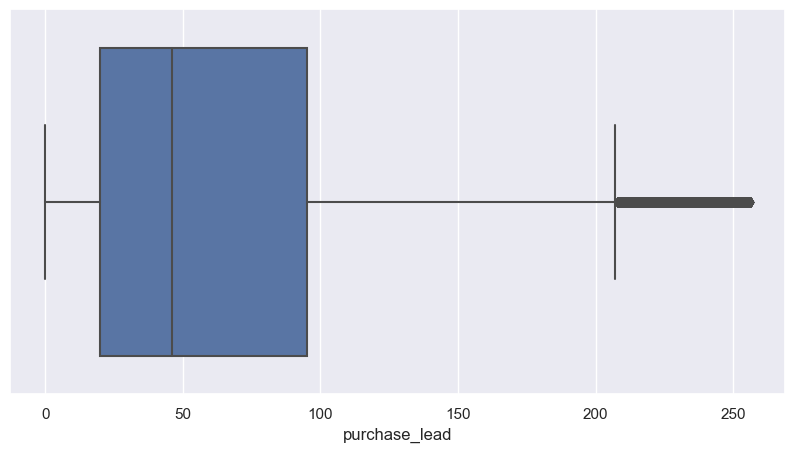

In [253]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='purchase_lead', data=df_cust)

<AxesSubplot:xlabel='purchase_lead'>

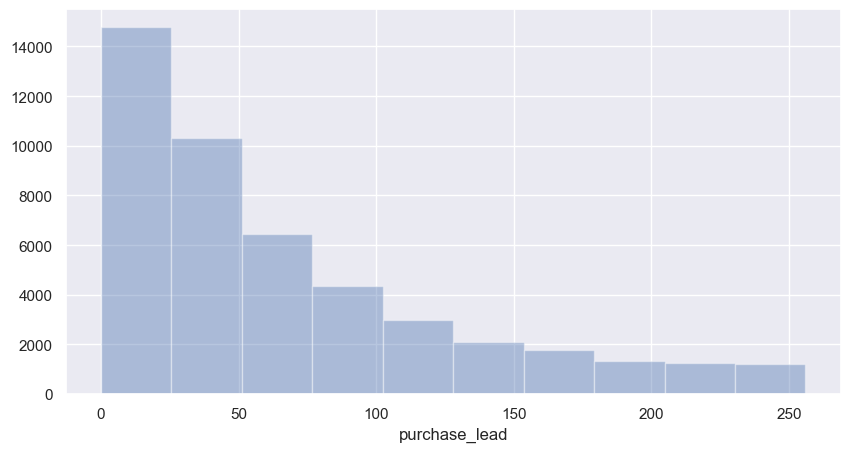

In [254]:
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_cust['purchase_lead'],bins=10, kde=False)

In [255]:
df_cust['purchase_lead'].describe()

count    46544.000000
mean        66.908044
std         62.205984
min          0.000000
25%         20.000000
50%         46.000000
75%         95.000000
max        256.000000
Name: purchase_lead, dtype: float64

In [256]:
df_cust['length_of_stay'].describe()

count    46544.000000
mean        23.557644
std         34.574494
min          0.000000
25%          5.000000
50%         17.000000
75%         29.000000
max        778.000000
Name: length_of_stay, dtype: float64

<AxesSubplot:xlabel='length_of_stay'>

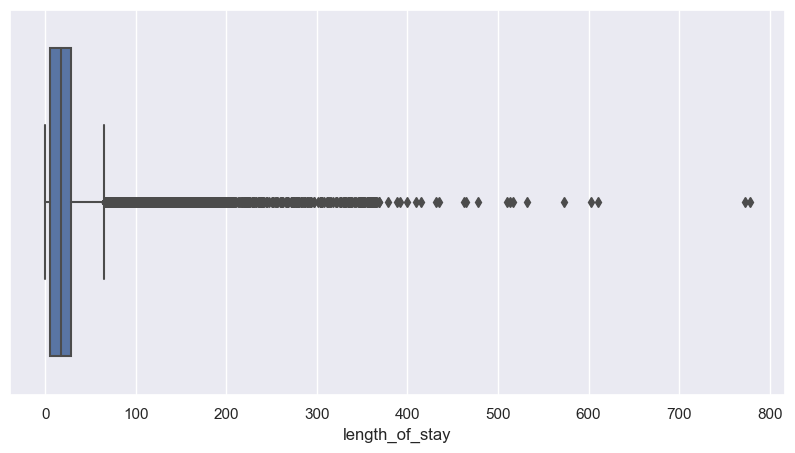

In [257]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='length_of_stay', data=df_cust)

In [258]:
df_cust.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,departure,destination
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,Others,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,Others,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,Others,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,Others,1,0,1,5.52,0,AKL,DEL
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,Others,1,0,1,5.52,0,AKL,DEL


In [259]:
df_cust.drop(['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals'], axis=1, inplace=True)

In [260]:
df_cust

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete,departure,destination
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,Others,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,Others,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,Others,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,Others,5.52,0,AKL,DEL
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,Others,5.52,0,AKL,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,5.62,0,PER,PNH
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,5.62,0,PER,PNH
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,5.62,0,PER,PNH
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,5.62,0,PER,PNH


In [261]:
df_cust['route'].value_counts()

AKLKUL    2277
PENTPE     882
MELSGN     800
ICNSIN     764
ICNSYD     650
          ... 
LBUTPE       1
ICNJED       1
CCUMRU       1
SGNXIY       1
MRUXIY       1
Name: route, Length: 793, dtype: int64

In [262]:
routeremake = df_cust['route'].value_counts()
routeremake

AKLKUL    2277
PENTPE     882
MELSGN     800
ICNSIN     764
ICNSYD     650
          ... 
LBUTPE       1
ICNJED       1
CCUMRU       1
SGNXIY       1
MRUXIY       1
Name: route, Length: 793, dtype: int64

In [263]:
# Keep only the top 5 values
top_5 = routeremake[:5].index

In [264]:
top_5

Index(['AKLKUL', 'PENTPE', 'MELSGN', 'ICNSIN', 'ICNSYD'], dtype='object')

In [265]:
# Replace all values outside of the top 5 with "Others"
df_cust['route'] = df_cust['route'].apply(lambda x: x if x in top_5 else "Others")

In [266]:
df_cust.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete,departure,destination
1,1,Internet,RoundTrip,112,20,3,Sat,Others,Others,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,Wed,Others,Others,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,Sat,Others,Others,5.52,0,AKL,DEL


#### drop departure an destinastion

In [267]:
df_cust.drop(['departure', 'destination'], axis=1, inplace=True)

In [268]:
df_cust.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete
1,1,Internet,RoundTrip,112,20,3,Sat,Others,Others,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,Others,Others,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,Others,Others,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,Others,Others,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,Others,Others,5.52,0


In [269]:
df_cust.corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,booking_complete
num_passengers,1.000000,0.187316,-0.111999,0.013127,-0.069101,0.026278
purchase_lead,0.187316,1.000000,-0.049859,0.033201,0.076469,-0.029760
length_of_stay,-0.111999,-0.049859,1.000000,-0.023655,0.137749,-0.041261
flight_hour,0.013127,0.033201,-0.023655,1.000000,-0.003122,0.006991
flight_duration,-0.069101,0.076469,0.137749,-0.003122,1.000000,-0.108065
booking_complete,0.026278,-0.029760,-0.041261,0.006991,-0.108065,1.000000


drop yang tidak terlalu penting

In [270]:
df_cust.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,booking_complete
1,1,Internet,RoundTrip,112,20,3,Sat,Others,Others,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,Others,Others,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,Others,Others,5.52,0


### DATA PREPARATION

In [271]:
#sales channel onehot
one_hot = pd.get_dummies(df_cust['sales_channel'])

In [272]:
one_hot = one_hot.add_prefix(df_cust.columns[0] + '_')

In [273]:
# Concatenate the original DataFrame and the one-hot encoded DataFrame
df_cust = pd.concat([df_cust, one_hot], axis=1)

In [274]:
#trip type one hot
one_hot2 = pd.get_dummies(df_cust['trip_type'])

In [275]:
one_hot2 = one_hot2.add_prefix(df_cust.columns[1] + '_')

In [276]:
df_cust = pd.concat([df_cust, one_hot2], axis=1)

In [277]:
#flight day one hot
one_hot3 = pd.get_dummies(df_cust['flight_day'])

In [278]:
one_hot3 = one_hot3.add_prefix(df_cust.columns[2] + '_')

In [279]:
df_cust = pd.concat([df_cust, one_hot3], axis=1)

In [280]:
#route one hot
one_hot4 = pd.get_dummies(df_cust['route'])

In [281]:
one_hot4 = one_hot4.add_prefix(df_cust.columns[3] + '_')

In [282]:
df_cust = pd.concat([df_cust, one_hot4], axis=1)

In [283]:
#booking_origin one hot
one_hot5 = pd.get_dummies(df_cust['booking_origin'])

In [284]:
one_hot5 = one_hot5.add_prefix(df_cust.columns[4] + '_')

In [285]:
df_cust = pd.concat([df_cust, one_hot5], axis=1)

In [286]:
df_cust.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,flight_duration,...,purchase_lead_ICNSYD,purchase_lead_MELSGN,purchase_lead_Others,purchase_lead_PENTPE,length_of_stay_Australia,length_of_stay_China,length_of_stay_Japan,length_of_stay_Malaysia,length_of_stay_Others,length_of_stay_South Korea
1,1,Internet,RoundTrip,112,20,3,Sat,Others,Others,5.52,...,0,0,1,0,0,0,0,0,1,0
2,2,Internet,RoundTrip,243,22,17,Wed,Others,Others,5.52,...,0,0,1,0,0,0,0,0,1,0
3,1,Internet,RoundTrip,96,31,4,Sat,Others,Others,5.52,...,0,0,1,0,0,0,0,0,1,0


drop sales the categories columns

In [287]:
df_cust.drop(['sales_channel','trip_type','flight_day','route','booking_origin'], axis=1, inplace=True)

In [288]:
df_cust.head(3)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,booking_complete,num_passengers_Internet,num_passengers_Mobile,sales_channel_CircleTrip,sales_channel_OneWay,...,purchase_lead_ICNSYD,purchase_lead_MELSGN,purchase_lead_Others,purchase_lead_PENTPE,length_of_stay_Australia,length_of_stay_China,length_of_stay_Japan,length_of_stay_Malaysia,length_of_stay_Others,length_of_stay_South Korea
1,1,112,20,3,5.52,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,2,243,22,17,5.52,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,96,31,4,5.52,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Modelling

In [289]:
from sklearn.model_selection import train_test_split # pembagi dataset menjadi training dan testing set
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report # evaluasi performa model

In [290]:
X = df_cust.drop(columns='booking_complete') # menempatkan features ke dalam variable X
X.head() # tampilkan 5 baris pertama

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,num_passengers_Internet,num_passengers_Mobile,sales_channel_CircleTrip,sales_channel_OneWay,sales_channel_RoundTrip,...,purchase_lead_ICNSYD,purchase_lead_MELSGN,purchase_lead_Others,purchase_lead_PENTPE,length_of_stay_Australia,length_of_stay_China,length_of_stay_Japan,length_of_stay_Malaysia,length_of_stay_Others,length_of_stay_South Korea
1,1,112,20,3,5.52,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,2,243,22,17,5.52,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,1,96,31,4,5.52,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,2,68,22,15,5.52,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
5,1,3,48,20,5.52,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [291]:
y = df_cust['booking_complete'] # menempatkan class label (target) ke dalam variabel y
y.head() # tampilkan 5 baris pertama

1    0
2    0
3    0
4    0
5    0
Name: booking_complete, dtype: int64

In [292]:
# membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_test.shape)
print(y_test.shape)

training dataset
(27926, 29)
(27926,)

testing dataset:
(18618, 29)
(18618,)


In [293]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

In [295]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k) # konfigurasi algoritma
    model_knn.fit(X_train, y_train) # training model/classifier
    y_pred = model_knn.predict(X_test) # melakukan prediksi
    scores.append(accuracy_score(y_test, y_pred)) # evaluasi performa

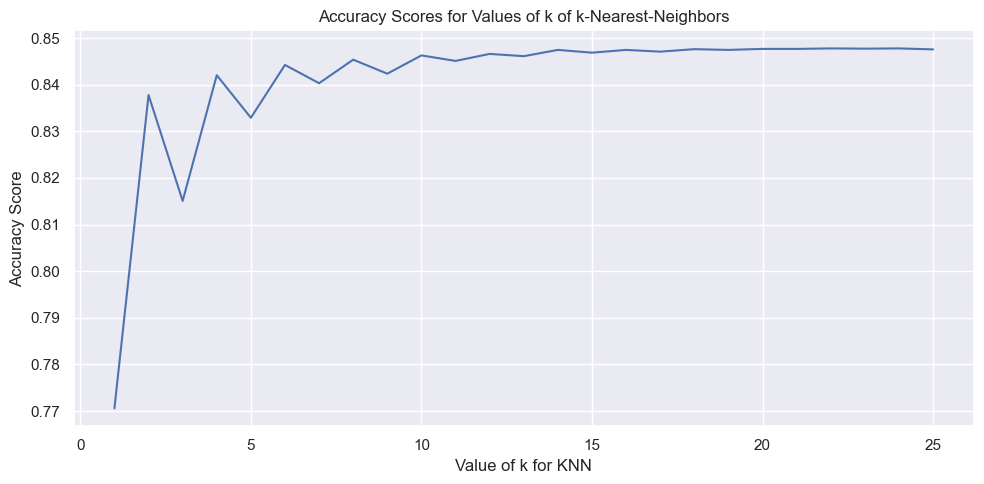

In [296]:
fig = plt.figure(figsize=(10, 5))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [297]:
model_knn = KNeighborsClassifier(n_neighbors=3) # konfigurasi algoritma
model_knn.fit(X_train,y_train) # training model/classifier
y_pred = model_knn.predict(X_test) # melakukan prediksi

In [298]:
print(accuracy_score(y_test, y_pred)) # evaluasi akurasi

0.8150714362444946


**confussion matrix**

In [299]:
print(confusion_matrix(y_test, y_pred)) # evaluasi confusion matrix

[[14855   930]
 [ 2513   320]]


**classification report**

In [300]:
print(classification_report(y_test, y_pred)) # evaluasi klasifikasi

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15785
           1       0.26      0.11      0.16      2833

    accuracy                           0.82     18618
   macro avg       0.56      0.53      0.53     18618
weighted avg       0.76      0.82      0.78     18618



### Logistic Regression

In [301]:
from sklearn.linear_model import LogisticRegression

In [302]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

In [303]:
#accuracy score
print(accuracy_score(y_test, y_pred))

0.8478354280803524


In [304]:
#confussionmatrix
print(confusion_matrix(y_test, y_pred))

[[15785     0]
 [ 2833     0]]


In [305]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92     15785
           1       0.00      0.00      0.00      2833

    accuracy                           0.85     18618
   macro avg       0.42      0.50      0.46     18618
weighted avg       0.72      0.85      0.78     18618



### random forest

In [306]:
from sklearn.ensemble import RandomForestClassifier

In [307]:
# model_rf = RandomForestClassifier()
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

### SVC 

In [308]:
from sklearn.svm import SVC

In [309]:
# model_svc = SVC()
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

### Decisison Tree

In [310]:
from sklearn.tree import DecisionTreeClassifier

In [311]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

**accuracy comparison for various models**

In [312]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
print(accuracy_scores)

[0.8150714362444946, 0.8478354280803524, 0.8478354280803524, 0.7714040176173595, 0.8425717048018047]


### the good model is logistic regression, svc, and random forest